## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the below cell to find the number of rows in the dataset.

In [3]:
number_of_rows = df.shape[0]
number_of_rows

294478

c. The number of unique users in the dataset.

In [4]:
number_of_users = df['user_id'].nunique()
number_of_users

290584

d. The proportion of users converted.

In [5]:
proportion_users_converted = df.query('converted == 1').user_id.nunique()/number_of_users
proportion_users_converted

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('landing_page == "new_page" & group =="control"').shape[0] + df.query('landing_page == "old_page" & group =="treatment"').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group']=='treatment')==(df['landing_page']=='new_page'))==True]
df2.shape[0]

290585

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
u_user_ids = df2.user_id.nunique()
u_user_ids

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
duplicated = df2[df2.user_id.duplicated()]
duplicated.user_id.values[0]

773192

c. What is the row information for the repeat **user_id**? 

In [12]:
d = df2[df2.user_id == duplicated.user_id.values[0]]
d

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
 df2.drop_duplicates(subset='user_id',inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2

user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
5        936923  2017-01-10 15:20:49.083499    control     old_page          0
6        679687  2017-01-19 03:26:46.940749  treatment     new_page          1
7        719014  2017-01-17 01:48:29.539573    control     old_page          0
8        817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9        839785  2017-01-15 18:11:06.610965  treatment     new_page          1
10       929503  2017-01-18 05:37:11.527370  treatment     new_page          0
11       834487  2017-01-21 22:37:47.774891  treatment     new_page          0
12       803683  2017-01-09 06:05:16.222706  treatment     new_page          0
13       944475  2017-01-22 01:31:09.573836  treatment     new_page          0
14       718956  2017-01-22 11:45:11.327945  treatment     new_page          0
15       644214  2017-01-22 02:05:21.719434    control     old_page          1
16       847721  2017-01-17 14:01:00.090575    control     old_page          0
17       888545  2017-01-08 06:37:26.332945  treatment     new_page          1
18       650559  2017-01-24 11:55:51.084801    control     old_page          0
19       935734  2017-01-17 20:33:37.428378    control     old_page          0
20       740805  2017-01-12 18:59:45.453277  treatment     new_page          0
21       759875  2017-01-09 16:11:58.806110  treatment     new_page          0
23       793849  2017-01-23 22:36:10.742811  treatment     new_page          0
24       905617  2017-01-20 14:12:19.345499  treatment     new_page          0
25       746742  2017-01-23 11:38:29.592148    control     old_page          0
26       892356  2017-01-05 09:35:14.904865  treatment     new_page          1
27       773302  2017-01-12 08:29:49.810594  treatment     new_page          0
28       913579  2017-01-24 09:11:39.164256    control     old_page          1
29       736159  2017-01-06 01:50:21.318242  treatment     new_page          0
30       690284  2017-01-13 17:22:57.182769    control     old_page          0
...         ...                         ...        ...          ...        ...
294448   776137  2017-01-12 05:53:12.386730  treatment     new_page          0
294449   883344  2017-01-22 23:15:58.645325  treatment     new_page          0
294450   825594  2017-01-06 12:37:08.897784  treatment     new_page          0
294451   875688  2017-01-14 07:19:49.042869    control     old_page          0
294452   927527  2017-01-12 10:52:11.084740    control     old_page          0
294453   789177  2017-01-17 18:17:56.215378    control     old_page          0
294454   937338  2017-01-19 03:23:22.236666  treatment     new_page          0
294455   733101  2017-01-23 12:52:58.711914  treatment     new_page          0
294456   679096  2017-01-02 16:43:49.237940  treatment     new_page          0
294457   691699  2017-01-09 23:42:35.963486  treatment     new_page          0
294458   807595  2017-01-22 10:43:09.285426  treatment     new_page          0
294459   924816  2017-01-20 10:59:03.481635    control     old_page          0
294460   846225  2017-01-16 15:24:46.705903  treatment     new_page          0
294461   740310  2017-01-10 17:22:19.762612    control     old_page          0
294462   677163  2017-01-03 19:41:51.902148  treatment     new_page          0
294463   832080  2017-01-19 13:18:27.352570    control     old_page          0
294464   834362  2017-01-17 01:51:56.106436    control     old_page          0
294465   925675  2017-01-07 20:38:26.346410  treatment     new_page          0
294466   923948  2017-01-09 16:33:41.104573    control    

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2[df2.converted==1].shape[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2[(df2.converted==1)&(df2.group=='control')].shape[0]/df2[df2.group=='control'].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2[(df2.converted==1)&(df2.group=='treatment')].shape[0]/df2[df2.group=='treatment'].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2[df2.landing_page=='new_page'].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No, accourding to the probability of converted people in treatment group we can find that the are less than the converted people in the control group**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

****h-null = $p_{old}$>=$p_{new}$****

****h-alt = $p_{new}$>$p_{old}$****


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
df2[df2.converted==1].shape[0]/df2.shape[0]

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
df2[df2.converted==1].shape[0]/df2.shape[0]

0.11959708724499628

c. What is $n_{new}$?

In [21]:
df2.query('group == "treatment"').user_id.nunique()

145310

d. What is $n_{old}$?

In [22]:
df2.query('group == "control"').user_id.nunique()

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = df2.sample(145310,replace=True).query('landing_page=="new_page"').converted


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = df2.sample(145274,replace=True).query('landing_page=="old_page"').converted


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

-0.0023166279229003134

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    new_sample_page_converted = df2.sample(145310,replace=True).query('landing_page=="new_page"').converted
    old_sample_page_converted = df2.sample(145274,replace=True).query('landing_page=="old_page"').converted
    p_diffs.append(new_sample_page_converted.mean() - old_sample_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   29.,   124.,   570.,  1439.,  2482.,  2650.,  1774.,   719.,
          180.,    33.]),
 array([-0.00769989, -0.00650553, -0.00531117, -0.00411681, -0.00292245,
        -0.00172808, -0.00053372,  0.00066064,  0.001855  ,  0.00304936,
         0.00424373]),
 <a list of 10 Patch objects>)

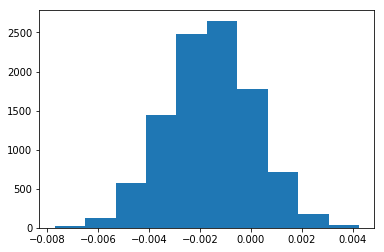

In [27]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
std = np.std(p_diffs)
null_vals = np.random.normal(0,std,10000)

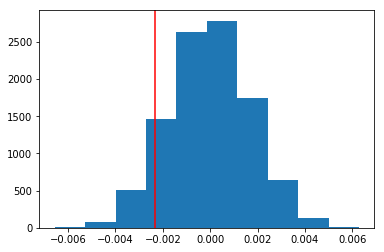

In [29]:

plt.hist(null_vals);
plt.axvline(p_diff,c='r')


In [30]:
p_val = (null_vals>p_diff).mean()
p_val

0.90690000000000004

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We have calculated the P-value of our null hypothesis and out P-value is > 5% as a result which means that we fail to reject ou null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1')['converted'].count()
convert_new = df2.query('landing_page == "new_page" & converted == 1')['converted'].count()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [43]:
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')


(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The P-value from the z-score is >5% which is consistenet with our previous conclusion.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept']=1
page_dummies = pd.get_dummies(df2['landing_page'])
new_df2 = df2.join(page_dummies)
group_dummies = pd.get_dummies(df2['group'])
newer_df2 = new_df2.join(group_dummies)
newer_df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  new_page  old_page  control  treatment  
0          1         0         1        1          0  
1          1         0         1        1          0  
2          1         1         0        0          1  
3          1         1         0        0          1  
4          1         0         1        1          0

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
model = sm.Logit(newer_df2['converted'],newer_df2[['intercept','new_page']])
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-13 21:38 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
new_page     -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**the null hypothesis is that the new page has no affect on the result $p_{new}$ = 0 and that the old page has an effect $p_{old} != 0$**

**the P-value for the new page is 18% and that indicates that it has no effect as it's larger than 5%**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It's a good Idea to add other factors as it gives the model new terms to consider when fitting the model, and usually it would improve the mode.**

**The disadvantge of adding other factor that it might cause overfitting to the model which would make it worse**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  
user_id                        
834778           0          1  
928468           0          1  
822059           1          1  
711597           0          1  
710616           0          1

In [37]:
df_new.head(0)

Empty DataFrame
Columns: [country, timestamp, group, landing_page, converted, intercept]
Index: []

In [38]:
### Create the necessary dummy variables
country_dummies = pd.get_dummies(df_new['country'])
country_dummies
all_data_df = newer_df2.set_index('user_id').join(country_dummies, how='inner')
all_data_df.head()


timestamp      group landing_page  converted  \
user_id                                                                  
851104   2017-01-21 22:11:48.556739    control     old_page          0   
804228   2017-01-12 08:01:45.159739    control     old_page          0   
661590   2017-01-11 16:55:06.154213  treatment     new_page          0   
853541   2017-01-08 18:28:03.143765  treatment     new_page          0   
864975   2017-01-21 01:52:26.210827    control     old_page          1   

         intercept  new_page  old_page  control  treatment  CA  UK  US  
user_id                                                                 
851104           1         0         1        1          0   0   0   1  
804228           1         0         1        1          0   0   0   1  
661590           1         1         0        0          1   0   0   1  
853541           1         1         0        0          1   0   0   1  
864975           1         0         1        1          0   0   0   1

In [39]:
model2 = sm.Logit(all_data_df['converted'],all_data_df[['intercept','new_page','CA','UK']])
res = model2.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-13 21:38 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
new_page     -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
all_data_df['CA_PAGE']=all_data_df['CA']*all_data_df['new_page']
all_data_df['UK_PAGE']=all_data_df['UK']*all_data_df['new_page']

In [41]:
model3 = sm.Logit(all_data_df['converted'],all_data_df[['intercept','new_page','CA','UK','CA_PAGE','UK_PAGE']])
res = model3.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-13 21:38 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
new_page     -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_PAGE      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_PAGE       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

**The parameters have no effect on the P-vale**

In [42]:
model2 = sm.OLS(all_data_df['converted'],all_data_df[['intercept','new_page','CA','UK']])
res = model2.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.000      
Dependent Variable: converted        AIC:                170539.4657
Date:               2020-09-13 21:38 BIC:                170581.7843
No. Observations:   290584           Log-Likelihood:     -85266.    
Df Model:           3                F-statistic:        1.640      
Df Residuals:       290580           Prob (F-statistic): 0.178      
R-squared:          0.000            Scale:              0.10529    
----------------------------------------------------------------------
              Coef.    Std.Err.      t       P>|t|     [0.025   0.975]
----------------------------------------------------------------------
intercept     0.1203     0.0009   128.2674   0.0000    0.1185   0.1222
new_page     -0.0016     0.0012    -1.3069   0.1912   -0.0039   0.0008
CA           -0.0042     0.0028    -1.5143   0.1299   -0.0097   0.0012
UK            0.0010     0.0014     0.7439   0.4569   -0.0017   0.0038
--------------------------------------------------------------------
Omnibus:             125551.169     Durbin-Watson:        1.995     
Prob(Omnibus):       0.000          Jarque-Bera (JB):     414297.780
Skew:                2.345          Prob(JB):             0.000     
Kurtosis:            6.497          Condition No.:        5         
====================================================================

"""

<a id='conclusions'></a>
## Conclusions

We fail to reject the null hypothesis
**The website should keep the old page and reject the new page**
